In [78]:
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [49]:
data = pd.read_csv('../Data untuk modelling/data_compile_agro_sentinel_1.csv')
data.head()

,Unnamed: 0,idsubsegmen_repair,obs,tahun,bulan,kdprov,idsubfinal,idkab,idkec,idsegmen,...,VH_9,VH_8,VH_7,VH_6,VH_5,VH_4,VH_3,VH_2,VH_1,VH_0
0,0,320104008A1,6.0,23,9,32,320104008A1239,3201,3201040,320104008,...,151,146,143,137,133,130,125,132,135,129
1,1,320104008A2,6.0,23,9,32,320104008A2239,3201,3201040,320104008,...,156,150,146,140,137,135,134,137,140,141
2,2,320104008C2,6.0,23,9,32,320104008C2239,3201,3201040,320104008,...,151,149,145,137,133,129,127,130,132,133
3,3,320111002B3,6.0,23,9,32,320111002B3239,3201,3201110,320111002,...,151,152,151,150,149,148,147,148,149,149
4,4,320126007A2,6.0,23,9,32,320126007A2239,3201,3201260,320126007,...,174,171,169,172,175,176,174,173,172,169


In [50]:
data['observ'] = np.floor(data['obs'])
columns_to_rename = [col for col in data.columns if col.startswith('VH_')]
new_column_names = {col: f"VH_t-{col.split('_')[1]}" for col in columns_to_rename}
data.rename(columns=new_column_names, inplace=True)
data.head()

,Unnamed: 0,idsubsegmen_repair,obs,tahun,bulan,kdprov,idsubfinal,idkab,idkec,idsegmen,...,VH_t-8,VH_t-7,VH_t-6,VH_t-5,VH_t-4,VH_t-3,VH_t-2,VH_t-1,VH_t-0,observ
0,0,320104008A1,6.0,23,9,32,320104008A1239,3201,3201040,320104008,...,146,143,137,133,130,125,132,135,129,6.0
1,1,320104008A2,6.0,23,9,32,320104008A2239,3201,3201040,320104008,...,150,146,140,137,135,134,137,140,141,6.0
2,2,320104008C2,6.0,23,9,32,320104008C2239,3201,3201040,320104008,...,149,145,137,133,129,127,130,132,133,6.0
3,3,320111002B3,6.0,23,9,32,320111002B3239,3201,3201110,320111002,...,152,151,150,149,148,147,148,149,149,6.0
4,4,320126007A2,6.0,23,9,32,320126007A2239,3201,3201260,320126007,...,171,169,172,175,176,174,173,172,169,6.0


/tmp/ipykernel_63928/1130970838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='observ', palette='pastel', edgecolor='black')


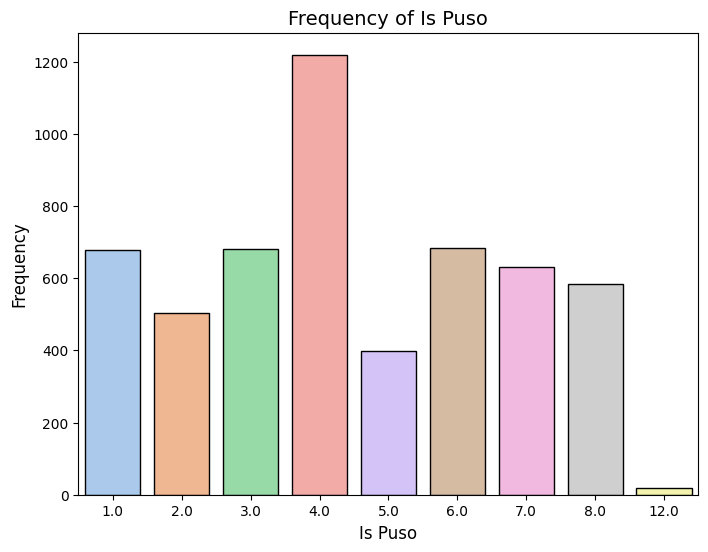

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='observ', palette='pastel', edgecolor='black')

# Add labels and title
plt.xlabel('Is Puso', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency of Is Puso', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()


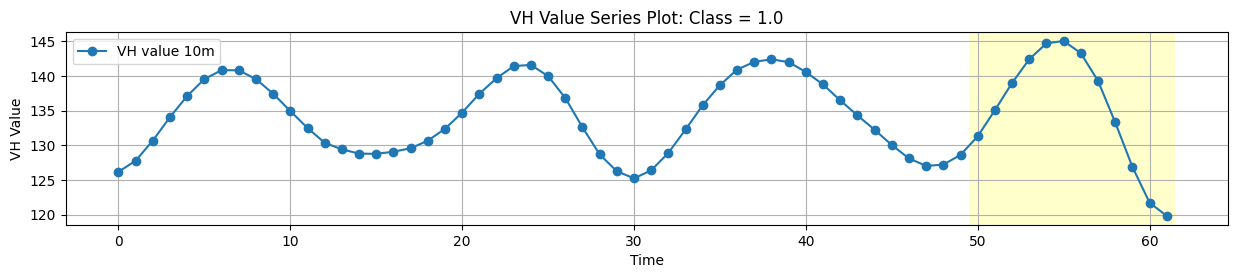

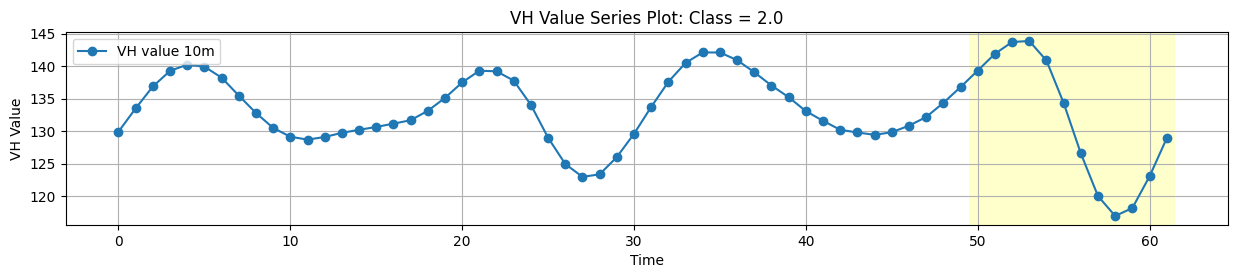

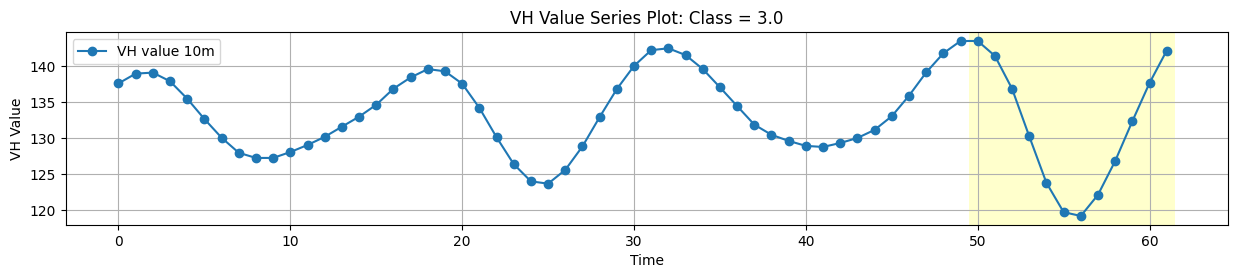

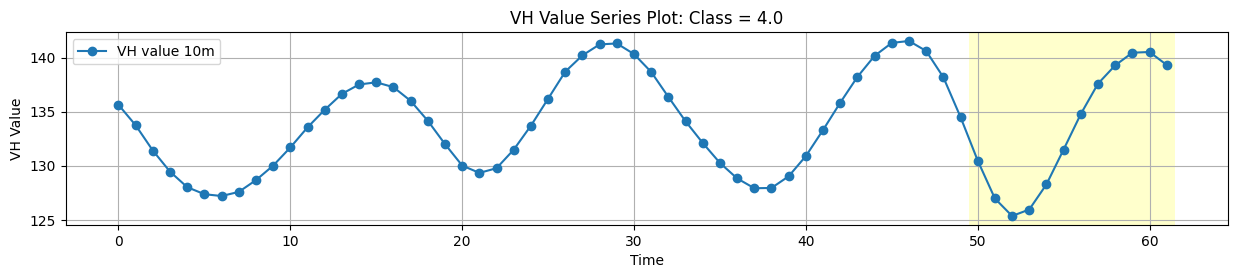

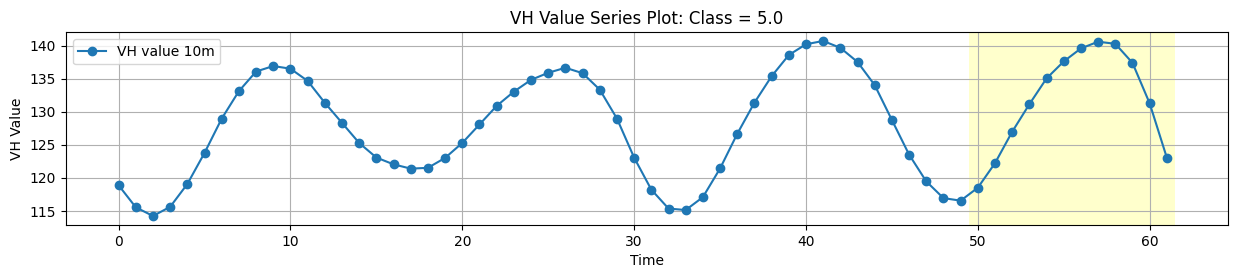

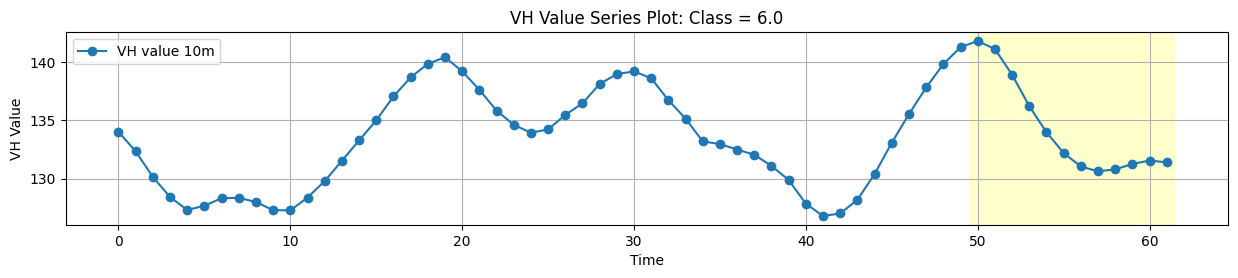

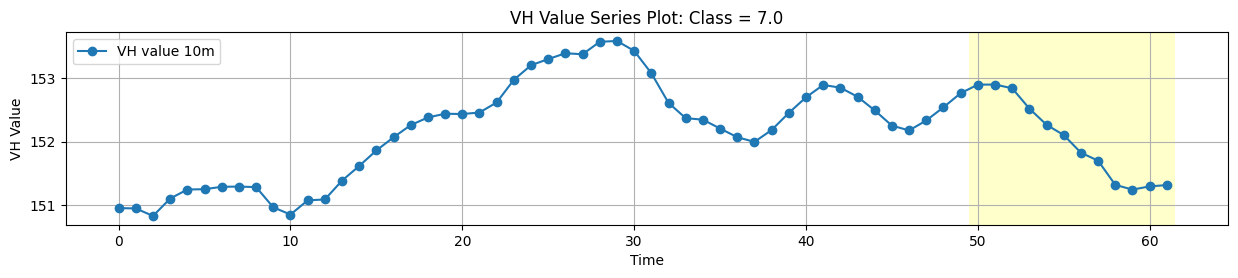

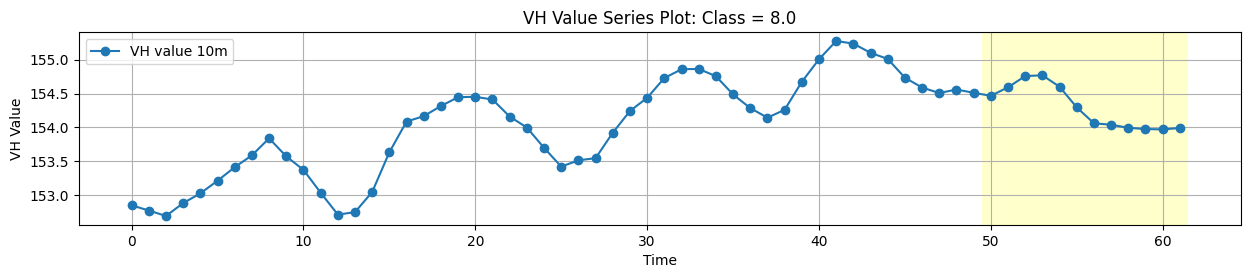

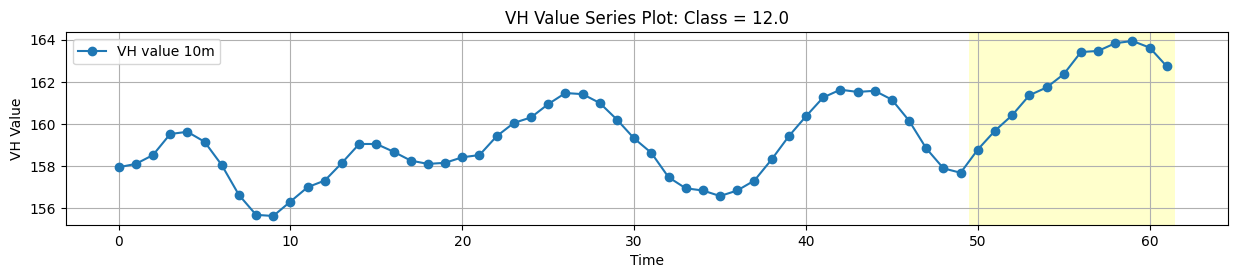

In [58]:
viz_ = [col for col in data.columns if col.startswith('VH_')]+['observ']

grouped_data = data[viz_].groupby('observ').mean()


for obs_value in grouped_data.index:
    plt.figure(figsize=(15, 2.5))
    plt.plot(grouped_data.loc[obs_value, [col for col in grouped_data.columns if col.startswith('VH_')]].values, marker='o', label='VH value 10m')
    plt.title(f'VH Value Series Plot: Class = {obs_value}')
    plt.xlabel('Time')
    plt.ylabel('VH Value')
    plt.legend()
    last_ten_values = 62
    plt.axvspan(last_ten_values - 0.5, 50 - 0.5, facecolor='yellow', alpha=0.2)

    plt.grid(True)
    plt.show()

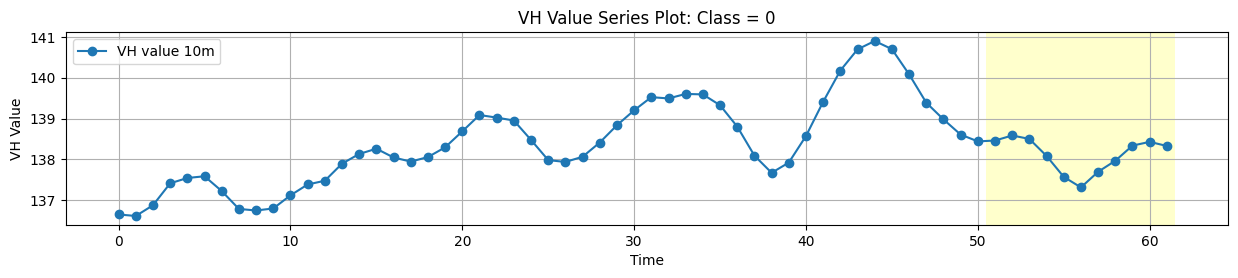

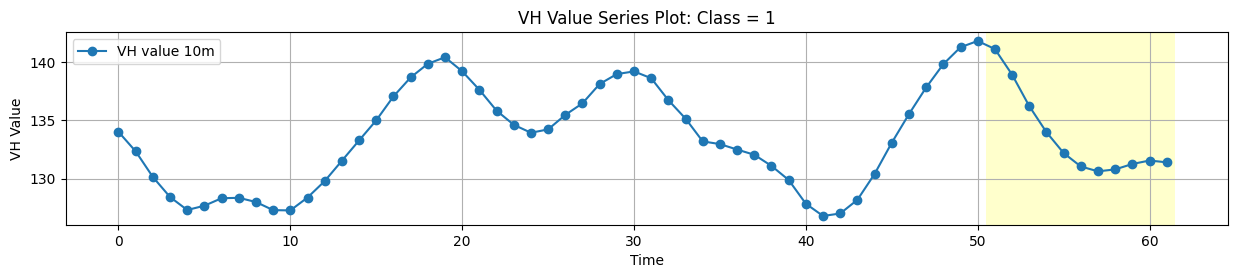

In [122]:
viz_ = [col for col in undersampled_data.columns if col.startswith('VH_')]+['is_puso']

grouped_data = undersampled_data[viz_].groupby('is_puso').mean()


for obs_value in grouped_data.index:
    plt.figure(figsize=(15, 2.5))
    plt.plot(grouped_data.loc[obs_value, [col for col in grouped_data.columns if col.startswith('VH_')]].values, marker='o', label='VH value 10m')
    plt.title(f'VH Value Series Plot: Class = {obs_value}')
    plt.xlabel('Time')
    plt.ylabel('VH Value')
    plt.legend()
    last_ten_values = 62
    plt.axvspan(last_ten_values - 0.5, 51 - 0.5, facecolor='yellow', alpha=0.2)

    plt.grid(True)
    plt.show()

/tmp/ipykernel_63928/2960352955.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min_count, random_state=42))  # Undersampling


Jumlah data setelah undersampling:
is_puso
0    684
1    684
Name: count, dtype: int64


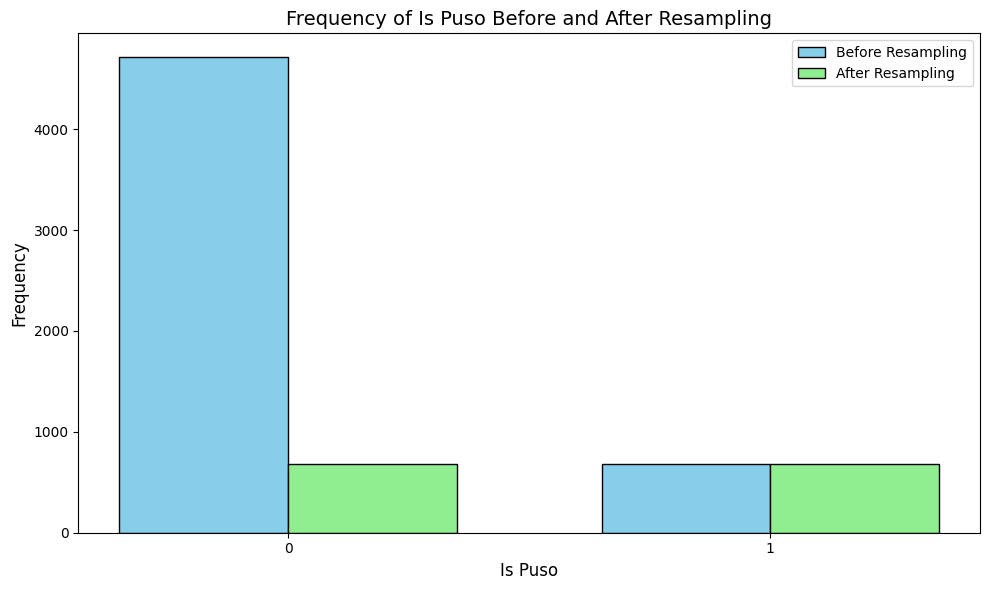

In [64]:
min_count = data['is_puso'].value_counts().min()

undersampled_data = (
    data.groupby('is_puso')
    .apply(lambda x: x.sample(n=min_count, random_state=42))  # Undersampling
    .reset_index(drop=True)
)

print("Jumlah data setelah undersampling:")
print(undersampled_data['is_puso'].value_counts())

# Hitung frekuensi sebelum dan sesudah resampling
frequency_before = data['is_puso'].value_counts()
frequency_after = undersampled_data['is_puso'].value_counts()

# Pastikan urutan indeks sama
categories = frequency_before.index  # Kategori is_puso
before_values = frequency_before.reindex(categories).values
after_values = frequency_after.reindex(categories).values

# Tentukan posisi bar
x = np.arange(len(categories))  # Indeks kategori
width = 0.35  # Lebar bar

# Plot multiple bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, before_values, width, label='Before Resampling', color='skyblue', edgecolor='black')
plt.bar(x + width / 2, after_values, width, label='After Resampling', color='lightgreen', edgecolor='black')

# Tambahkan label dan judul
plt.xlabel('Is Puso', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency of Is Puso Before and After Resampling', fontsize=14)
plt.xticks(x, categories, fontsize=10)  # Menyesuaikan label sumbu X dengan kategori
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

# Tampilkan plot
plt.tight_layout()
plt.show()

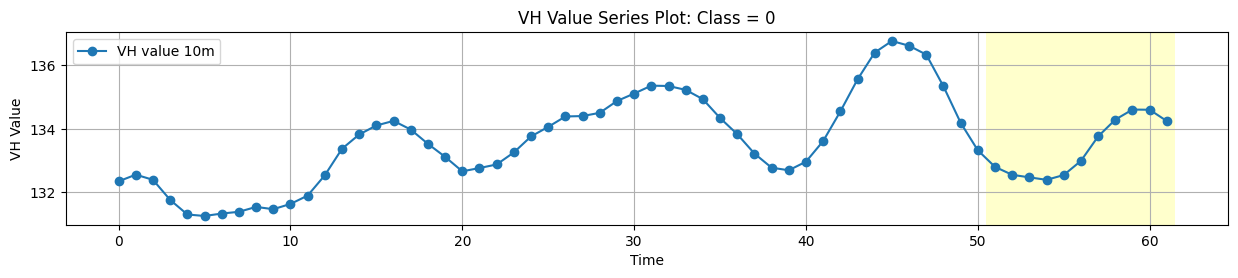

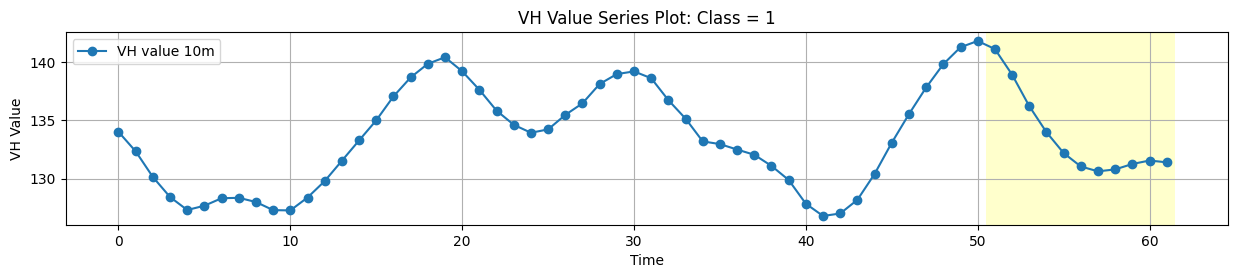

In [121]:
viz_ = [col for col in undersampled_data.columns if col.startswith('VH_')]+['is_puso']

grouped_data = undersampled_data_drop_np[viz_].groupby('is_puso').mean()


for obs_value in grouped_data.index:
    plt.figure(figsize=(15, 2.5))
    plt.plot(grouped_data.loc[obs_value, [col for col in grouped_data.columns if col.startswith('VH_')]].values, marker='o', label='VH value 10m')
    plt.title(f'VH Value Series Plot: Class = {obs_value}')
    plt.xlabel('Time')
    plt.ylabel('VH Value')
    plt.legend()
    last_ten_values = 62
    plt.axvspan(last_ten_values - 0.5, 51 - 0.5, facecolor='yellow', alpha=0.2)

    plt.grid(True)
    plt.show()

In [66]:
data_drop_np = data.loc[data['observ'].isin([1,2,3,4,5,6])]
data_drop_np

,Unnamed: 0,idsubsegmen_repair,obs,tahun,bulan,kdprov,idsubfinal,idkab,idkec,idsegmen,...,VH_t-8,VH_t-7,VH_t-6,VH_t-5,VH_t-4,VH_t-3,VH_t-2,VH_t-1,VH_t-0,observ
0,0,320104008A1,6.0,23,9,32,320104008A1239,3201,3201040,320104008,...,146,143,137,133,130,125,132,135,129,6.0
1,1,320104008A2,6.0,23,9,32,320104008A2239,3201,3201040,320104008,...,150,146,140,137,135,134,137,140,141,6.0
2,2,320104008C2,6.0,23,9,32,320104008C2239,3201,3201040,320104008,...,149,145,137,133,129,127,130,132,133,6.0
3,3,320111002B3,6.0,23,9,32,320111002B3239,3201,3201110,320111002,...,152,151,150,149,148,147,148,149,149,6.0
4,4,320126007A2,6.0,23,9,32,320126007A2239,3201,3201260,320126007,...,171,169,172,175,176,174,173,172,169,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,5387,321707002A3,2.0,22,12,32,321707002A32212,3217,3217070,321707002,...,143,140,135,125,120,117,121,127,130,2.0
5389,5389,321806002C3,2.0,22,12,32,321806002C32212,3218,3218060,321806002,...,130,113,92,60,44,68,98,119,130,2.0
5393,5393,327310114B1,5.0,22,12,32,327310114B12212,3273,3273101,327310114,...,155,158,159,160,156,149,135,128,124,5.0
5395,5395,327503005A2,1.0,22,12,32,327503005A22212,3275,3275030,327503005,...,163,159,154,150,147,145,144,145,146,1.0


/tmp/ipykernel_63928/3926896675.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_drop_np, x='observ', palette='pastel', edgecolor='black')


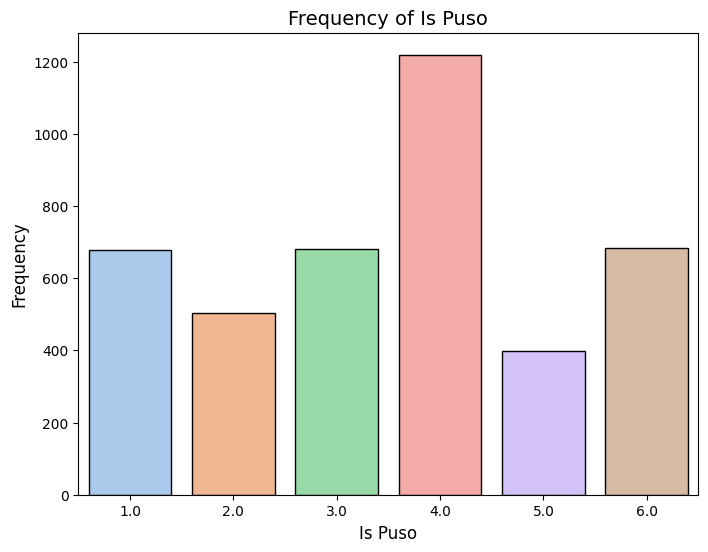

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_drop_np, x='observ', palette='pastel', edgecolor='black')

# Add labels and title
plt.xlabel('Is Puso', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency of Is Puso', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()

/tmp/ipykernel_63928/4228712371.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min_count, random_state=42))  # Undersampling


Jumlah data setelah undersampling:
is_puso
0    684
1    684
Name: count, dtype: int64


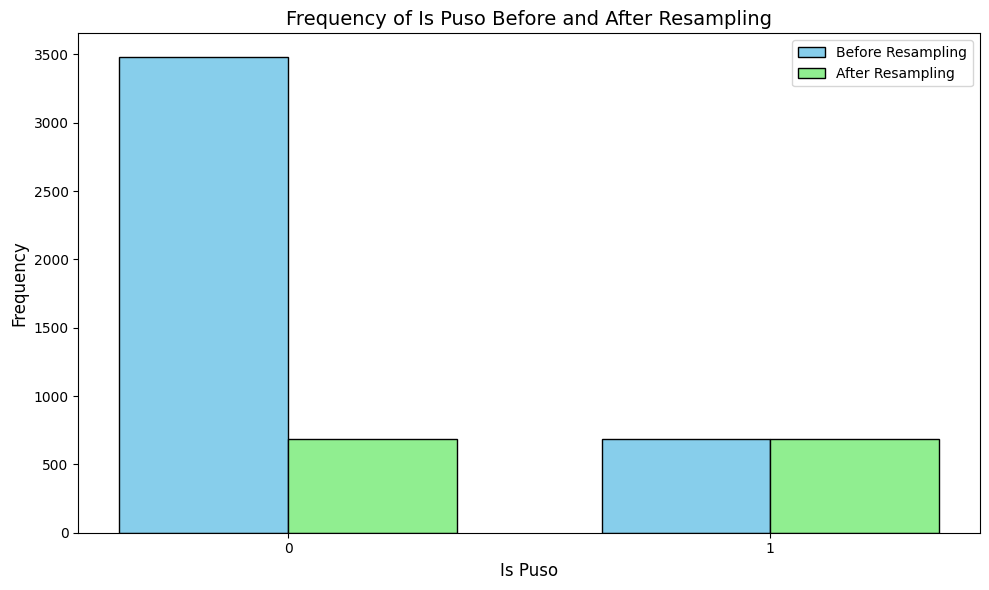

In [103]:
min_count = data_drop_np['is_puso'].value_counts().min()

undersampled_data_drop_np = (
    data_drop_np.groupby('is_puso')
    .apply(lambda x: x.sample(n=min_count, random_state=42))  # Undersampling
    .reset_index(drop=True)
)

print("Jumlah data setelah undersampling:")
print(undersampled_data_drop_np['is_puso'].value_counts())

# Hitung frekuensi sebelum dan sesudah resampling
frequency_before = data_drop_np['is_puso'].value_counts()
frequency_after = undersampled_data['is_puso'].value_counts()

# Pastikan urutan indeks sama
categories = frequency_before.index  # Kategori is_puso
before_values = frequency_before.reindex(categories).values
after_values = frequency_after.reindex(categories).values

# Tentukan posisi bar
x = np.arange(len(categories))  # Indeks kategori
width = 0.35  # Lebar bar

# Plot multiple bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, before_values, width, label='Before Resampling', color='skyblue', edgecolor='black')
plt.bar(x + width / 2, after_values, width, label='After Resampling', color='lightgreen', edgecolor='black')

# Tambahkan label dan judul
plt.xlabel('Is Puso', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency of Is Puso Before and After Resampling', fontsize=14)
plt.xticks(x, categories, fontsize=10)  # Menyesuaikan label sumbu X dengan kategori
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

# Tampilkan plot
plt.tight_layout()
plt.show()

In [134]:
viz_

['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'is_puso']

In [104]:
# Fitur Fase Tumbuh
undersampled_data['F1'] = undersampled_data['VH_t-0']
undersampled_data['F2'] = undersampled_data.loc[:, 'VH_t-9':'VH_t-0'].min(axis=1)
undersampled_data['F3'] = undersampled_data.loc[:, 'VH_t-9':'VH_t-0'].max(axis=1)
undersampled_data['F4'] = undersampled_data.loc[:, 'VH_t-9':'VH_t-0'].idxmin(axis=1)
undersampled_data['F4'] = undersampled_data['F4'].str.extract(r'VH_t-(\d+)')[0].astype(int)
undersampled_data['F5'] = undersampled_data.loc[:, 'VH_t-9':'VH_t-0'].idxmax(axis=1)
undersampled_data['F5'] = undersampled_data['F5'].str.extract(r'VH_t-(\d+)')[0].astype(int)

# Fitur Tahunan
undersampled_data['F6'] = undersampled_data.loc[:, 'VH_t-31':'VH_t-0'].min(axis=1)
undersampled_data['F7'] = undersampled_data.loc[:, 'VH_t-31':'VH_t-0'].max(axis=1)
undersampled_data['F8'] = undersampled_data['F7'] - undersampled_data['F6']

# statistics
undersampled_data['F9'] = undersampled_data.loc[:, 'VH_t-31':'VH_t-0'].mean(axis=1)
undersampled_data['F10'] = undersampled_data.loc[:, 'VH_t-31':'VH_t-0'].var(axis=1)

undersampled_data

,Unnamed: 0,idsubsegmen_repair,obs,tahun,bulan,kdprov,idsubfinal,idkab,idkec,idsegmen,...,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,1478,320302017C1,8.00,23,4,32,320302017C1234,3203,3203020,320302017,...,170,138,170,4,0,138,187,49,163.03125,193.773185
1,2469,320531004C2,7.99,23,2,32,320531004C2232,3205,3205310,320531004,...,169,167,170,2,9,157,171,14,167.15625,13.619960
2,4157,320209014A1,1.00,22,4,32,320209014A1224,3202,3202090,320209014,...,133,133,154,0,4,132,154,22,145.96875,41.773185
3,4347,320204102A2,8.00,22,11,32,320204102A22211,3202,3202041,320204102,...,125,119,156,1,5,119,156,37,136.40625,114.442540
4,2709,320723015C1,1.00,23,12,32,320723015C12312,3207,3207230,320723015,...,139,136,159,9,3,109,159,50,139.56250,209.673387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,71,321612002C2,6.00,23,9,32,321612002C2239,3216,3216120,321612002,...,114,114,147,0,6,81,158,77,134.84375,391.232863
1364,302,321203003B1,6.00,23,8,32,321203003B1238,3212,3212030,321203003,...,125,91,129,7,1,91,161,70,121.25000,296.387097
1365,1635,320521014B2,6.00,23,11,32,320521014B22311,3205,3205210,320521014,...,111,102,111,8,0,67,128,61,108.59375,248.184476
1366,2390,320508039C1,6.00,23,2,32,320508039C1232,3205,3205080,320508039,...,154,150,160,4,9,150,171,21,156.62500,34.241935


In [105]:
# Fitur Fase Tumbuh
undersampled_data_drop_np['F1'] = undersampled_data_drop_np['VH_t-0']
undersampled_data_drop_np['F2'] = undersampled_data_drop_np.loc[:, 'VH_t-9':'VH_t-0'].min(axis=1)
undersampled_data_drop_np['F3'] = undersampled_data_drop_np.loc[:, 'VH_t-9':'VH_t-0'].max(axis=1)
undersampled_data_drop_np['F4'] = undersampled_data_drop_np.loc[:, 'VH_t-9':'VH_t-0'].idxmin(axis=1)
undersampled_data_drop_np['F4'] = undersampled_data_drop_np['F4'].str.extract(r'VH_t-(\d+)')[0].astype(int)
undersampled_data_drop_np['F5'] = undersampled_data_drop_np.loc[:, 'VH_t-9':'VH_t-0'].idxmax(axis=1)
undersampled_data_drop_np['F5'] = undersampled_data_drop_np['F5'].str.extract(r'VH_t-(\d+)')[0].astype(int)

# Fitur Tahunan
undersampled_data_drop_np['F6'] = undersampled_data_drop_np.loc[:, 'VH_t-31':'VH_t-0'].min(axis=1)
undersampled_data_drop_np['F7'] = undersampled_data_drop_np.loc[:, 'VH_t-31':'VH_t-0'].max(axis=1)
undersampled_data_drop_np['F8'] = undersampled_data_drop_np['F7'] - undersampled_data_drop_np['F6']

# statistics
undersampled_data_drop_np['F9'] = undersampled_data_drop_np.loc[:, 'VH_t-31':'VH_t-0'].mean(axis=1)
undersampled_data_drop_np['F10'] = undersampled_data_drop_np.loc[:, 'VH_t-31':'VH_t-0'].var(axis=1)

undersampled_data_drop_np

,Unnamed: 0,idsubsegmen_repair,obs,tahun,bulan,kdprov,idsubfinal,idkab,idkec,idsegmen,...,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,3915,320104008A2,4.0,22,7,32,320104008A2227,3201,3201040,320104008,...,155,149,155,9,0,140,161,21,151.53125,24.128024
1,1837,321705005A2,5.0,23,11,32,321705005A22311,3217,3217050,321705005,...,148,114,148,5,0,114,152,38,136.96875,112.031250
2,2223,320212115C3,1.0,23,5,32,320212115C3235,3202,3202121,320212115,...,133,127,162,1,6,114,162,48,145.15625,143.619960
3,2409,320130006C3,4.0,23,2,32,320130006C3232,3201,3201300,320130006,...,147,139,153,5,9,139,161,22,150.75000,48.516129
4,2723,321014001B3,5.0,23,12,32,321014001B32312,3210,3210140,321014001,...,92,76,109,4,9,76,157,81,113.78125,373.079637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,71,321612002C2,6.0,23,9,32,321612002C2239,3216,3216120,321612002,...,114,114,147,0,6,81,158,77,134.84375,391.232863
1364,302,321203003B1,6.0,23,8,32,321203003B1238,3212,3212030,321203003,...,125,91,129,7,1,91,161,70,121.25000,296.387097
1365,1635,320521014B2,6.0,23,11,32,320521014B22311,3205,3205210,320521014,...,111,102,111,8,0,67,128,61,108.59375,248.184476
1366,2390,320508039C1,6.0,23,2,32,320508039C1232,3205,3205080,320508039,...,154,150,160,4,9,150,171,21,156.62500,34.241935


In [124]:
# Fitur Fase Tumbuh
data['F1'] = data['VH_t-0']
data['F2'] = data.loc[:, 'VH_t-9':'VH_t-0'].min(axis=1)
data['F3'] = data.loc[:, 'VH_t-9':'VH_t-0'].max(axis=1)
data['F4'] = data.loc[:, 'VH_t-9':'VH_t-0'].idxmin(axis=1)
data['F4'] = data['F4'].str.extract(r'VH_t-(\d+)')[0].astype(int)
data['F5'] = data.loc[:, 'VH_t-9':'VH_t-0'].idxmax(axis=1)
data['F5'] = data['F5'].str.extract(r'VH_t-(\d+)')[0].astype(int)

# Fitur Tahunan
data['F6'] = data.loc[:, 'VH_t-31':'VH_t-0'].min(axis=1)
data['F7'] = data.loc[:, 'VH_t-31':'VH_t-0'].max(axis=1)
data['F8'] = data['F7'] - data['F6']

# statistics
data['F9'] = data.loc[:, 'VH_t-31':'VH_t-0'].mean(axis=1)
data['F10'] = data.loc[:, 'VH_t-31':'VH_t-0'].var(axis=1)

In [126]:
# Fitur Fase Tumbuh
data_drop_np['F1'] = data_drop_np['VH_t-0']
data_drop_np['F2'] = data_drop_np.loc[:, 'VH_t-9':'VH_t-0'].min(axis=1)
data_drop_np['F3'] = data_drop_np.loc[:, 'VH_t-9':'VH_t-0'].max(axis=1)
data_drop_np['F4'] = data_drop_np.loc[:, 'VH_t-9':'VH_t-0'].idxmin(axis=1)
data_drop_np['F4'] = data_drop_np['F4'].str.extract(r'VH_t-(\d+)')[0].astype(int)
data_drop_np['F5'] = data_drop_np.loc[:, 'VH_t-9':'VH_t-0'].idxmax(axis=1)
data_drop_np['F5'] = data_drop_np['F5'].str.extract(r'VH_t-(\d+)')[0].astype(int)

# Fitur Tahunan
data_drop_np['F6'] = data_drop_np.loc[:, 'VH_t-31':'VH_t-0'].min(axis=1)
data_drop_np['F7'] = data_drop_np.loc[:, 'VH_t-31':'VH_t-0'].max(axis=1)
data_drop_np['F8'] = data_drop_np['F7'] - data_drop_np['F6']

# statistics
data_drop_np['F9'] = data_drop_np.loc[:, 'VH_t-31':'VH_t-0'].mean(axis=1)
data_drop_np['F10'] = data_drop_np.loc[:, 'VH_t-31':'VH_t-0'].var(axis=1)

/tmp/ipykernel_63928/3156783209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop_np['F1'] = data_drop_np['VH_t-0']
/tmp/ipykernel_63928/3156783209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop_np['F2'] = data_drop_np.loc[:, 'VH_t-9':'VH_t-0'].min(axis=1)
/tmp/ipykernel_63928/3156783209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [108]:
undersampled_data_drop_np['observ'].unique()

array([4., 5., 1., 3., 2., 6.])

Fold 1 - Train Accuracy: 1.00, Test Accuracy: 0.66
Fold 2 - Train Accuracy: 1.00, Test Accuracy: 0.67
Fold 3 - Train Accuracy: 1.00, Test Accuracy: 0.64

Best fold based on F1 score (Fold 2):
  Test Accuracy   : 0.67
  Test Precision   : 0.67
  Test Recall      : 0.67
  Test F1 Score    : 0.67

Final Metrics for the Best Model:
  Accuracy   : 0.89
  Precision  : 0.89
  Recall     : 0.89
  F1 Score   : 0.89


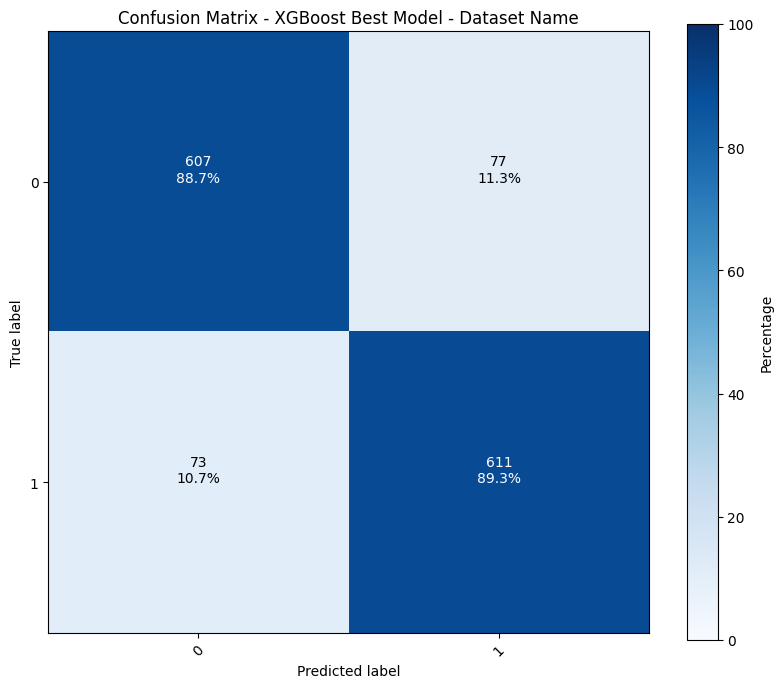


Precision, Recall, F1 Score per kelas:
Class 0:
  Precision : 0.89
  Recall    : 0.89
  F1 Score  : 0.89
Class 1:
  Precision : 0.89
  Recall    : 0.89
  F1 Score  : 0.89


In [153]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Data
X = undersampled_data_drop_np.loc[:, 'F1':'F10']
y = undersampled_data_drop_np['is_puso'].astype(int)

# Label Encoding for target variable y
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Encodes the labels to start from 0

# Model XGBoost
xgb_model = xgb.XGBClassifier(random_state=1234, eval_metric="mlogloss", n_jobs=16)

# Cross-validation (3-Fold)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)

# Scoring Metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform Cross-Validation
cv_results = cross_validate(xgb_model, X, y_encoded, cv=cv, scoring=scoring, return_train_score=True, return_estimator=True)

# Display fold-wise metrics for analysis
for fold, (train_index, test_index) in enumerate(cv.split(X, y_encoded)):
    print(f"Fold {fold + 1} - Train Accuracy: {cv_results['train_accuracy'][fold]:.2f}, Test Accuracy: {cv_results['test_accuracy'][fold]:.2f}")

# Find the best fold based on the test F1 score
best_fold_idx = np.argmax(cv_results['test_f1'])  # Index of the fold with the highest test F1 score

# Get the best model from that fold
best_model = cv_results['estimator'][best_fold_idx]

# Output the metrics for the best fold
print(f"\nBest fold based on F1 score (Fold {best_fold_idx + 1}):")
print(f"  Test Accuracy   : {cv_results['test_accuracy'][best_fold_idx]:.2f}")
print(f"  Test Precision   : {cv_results['test_precision'][best_fold_idx]:.2f}")
print(f"  Test Recall      : {cv_results['test_recall'][best_fold_idx]:.2f}")
print(f"  Test F1 Score    : {cv_results['test_f1'][best_fold_idx]:.2f}")

# Use the best model to make predictions
best_model_pred = best_model.predict(X)

# Evaluate metrics for the best model on the entire dataset
final_accuracy = accuracy_score(y_encoded, best_model_pred)
final_precision = precision_score(y_encoded, best_model_pred, average='weighted')
final_recall = recall_score(y_encoded, best_model_pred, average='weighted')
final_f1 = f1_score(y_encoded, best_model_pred, average='weighted')

# Display the final metrics for the best model
print("\nFinal Metrics for the Best Model:")
print(f"  Accuracy   : {final_accuracy:.2f}")
print(f"  Precision  : {final_precision:.2f}")
print(f"  Recall     : {final_recall:.2f}")
print(f"  F1 Score   : {final_f1:.2f}")

# Confusion Matrix for the Best Model
cm_best = confusion_matrix(y_encoded, best_model_pred)
cm_best_percentages = (cm_best.T / cm_best.sum(axis=1) * 100).T

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title, dataset_name):
    plt.figure(figsize=(8, 8))
    
    percentages = (cm.T / cm.sum(axis=1) * 100).T  # Normalize to get percentages
    
    plt.imshow(percentages, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=100)
    plt.title(f'Confusion Matrix - {title} - {dataset_name}')
    
    # Add colorbar with shrink parameter to reduce size
    cbar = plt.colorbar(label='Percentage', shrink=0.8)  # Shrinks the colorbar by 50%
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add frequency and percentage labels
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, f"{cm[i, j]}\n{percentages[i, j]:.1f}%", 
                     horizontalalignment='center', 
                     color='white' if percentages[i, j] > 50 else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plt.close()

# Call the function to plot the confusion matrix for the best model
plot_confusion_matrix(cm_best, encoder.classes_, "XGBoost Best Model", "Dataset Name")

# Precision, Recall, F1 per class
precision_per_class = precision_score(y_encoded, best_model_pred, average=None)
recall_per_class = recall_score(y_encoded, best_model_pred, average=None)
f1_per_class = f1_score(y_encoded, best_model_pred, average=None)

print("\nPrecision, Recall, F1 Score per kelas:")
for i, cls in enumerate(encoder.classes_):
    print(f"Class {cls}:")
    print(f"  Precision : {precision_per_class[i]:.2f}")
    print(f"  Recall    : {recall_per_class[i]:.2f}")
    print(f"  F1 Score  : {f1_per_class[i]:.2f}")

Rata-rata hasil training (3-Fold):
  Akurasi   : 1.00
  Presisi   : 1.00
  Recall    : 1.00
  F1 Score  : 1.00

Rata-rata hasil testing (3-Fold):
  Akurasi   : 0.49
  Presisi   : 0.49
  Recall    : 0.49
  F1 Score  : 0.48


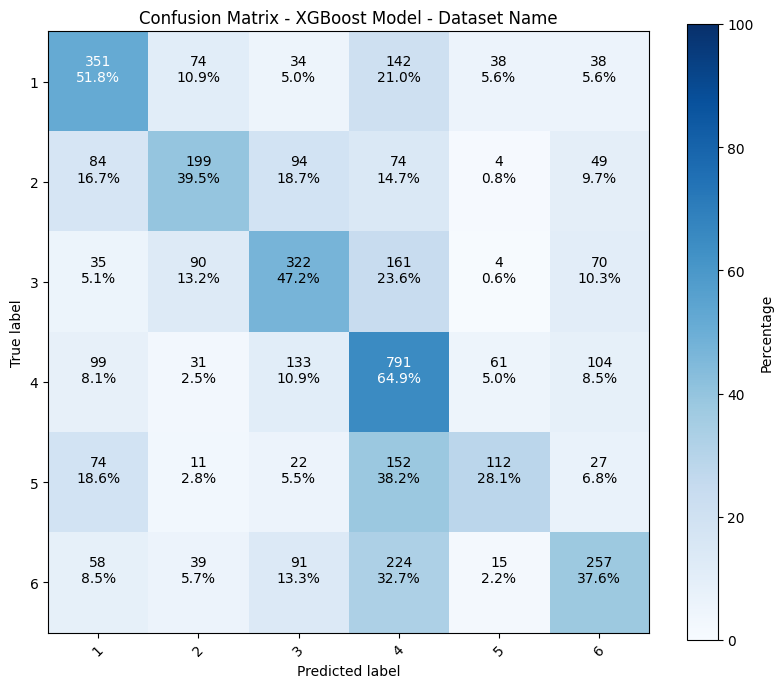


Precision, Recall, F1 Score per kelas:
Class 1:
  Precision : 0.50
  Recall    : 0.52
  F1 Score  : 0.51
Class 2:
  Precision : 0.45
  Recall    : 0.39
  F1 Score  : 0.42
Class 3:
  Precision : 0.46
  Recall    : 0.47
  F1 Score  : 0.47
Class 4:
  Precision : 0.51
  Recall    : 0.65
  F1 Score  : 0.57
Class 5:
  Precision : 0.48
  Recall    : 0.28
  F1 Score  : 0.35
Class 6:
  Precision : 0.47
  Recall    : 0.38
  F1 Score  : 0.42


In [116]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Data
X = data_drop_np.loc[:, 'VH_t-31':'VH_t-0']
y = data_drop_np['observ'].astype(int)

# Label Encoding for target variable y
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Encodes the labels to start from 0

# Model XGBoost
xgb_model = xgb.XGBClassifier(random_state=1234, eval_metric="mlogloss", n_jobs=16)

# Cross-validation (3-Fold)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)

# Scoring Metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform Cross-Validation
cv_results = cross_validate(xgb_model, X, y_encoded, cv=cv, scoring=scoring, return_train_score=True)

# Rata-rata skor untuk Training dan Testing
train_accuracy_mean = np.mean(cv_results['train_accuracy'])
test_accuracy_mean = np.mean(cv_results['test_accuracy'])

train_precision_mean = np.mean(cv_results['train_precision'])
test_precision_mean = np.mean(cv_results['test_precision'])

train_recall_mean = np.mean(cv_results['train_recall'])
test_recall_mean = np.mean(cv_results['test_recall'])

train_f1_mean = np.mean(cv_results['train_f1'])
test_f1_mean = np.mean(cv_results['test_f1'])

# Training dan Testing Summary
print("Rata-rata hasil training (3-Fold):")
print(f"  Akurasi   : {train_accuracy_mean:.2f}")
print(f"  Presisi   : {train_precision_mean:.2f}")
print(f"  Recall    : {train_recall_mean:.2f}")
print(f"  F1 Score  : {train_f1_mean:.2f}")

print("\nRata-rata hasil testing (3-Fold):")
print(f"  Akurasi   : {test_accuracy_mean:.2f}")
print(f"  Presisi   : {test_precision_mean:.2f}")
print(f"  Recall    : {test_recall_mean:.2f}")
print(f"  F1 Score  : {test_f1_mean:.2f}")

# Confusion Matrix for Final Evaluation
y_pred = cross_val_predict(xgb_model, X, y_encoded, cv=cv)

cm = confusion_matrix(y_encoded, y_pred)  # Frequency (count)
cm_percentages = (cm.T / cm.sum(axis=1) * 100).T  # Percentages
classes = encoder.classes_  # Get the original class labels after encoding

def plot_confusion_matrix(cm, classes, title, dataset_name):
    plt.figure(figsize=(8, 8))
    
    percentages = (cm.T / cm.sum(axis=1) * 100).T  # Normalize to get percentages
    
    plt.imshow(percentages, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=100)
    plt.title(f'Confusion Matrix - {title} - {dataset_name}')
    
    # Add colorbar with shrink parameter to reduce size
    cbar = plt.colorbar(label='Percentage', shrink=0.8)  # Shrinks the colorbar by 50%
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add frequency and percentage labels
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, f"{cm[i, j]}\n{percentages[i, j]:.1f}%", 
                     horizontalalignment='center', 
                     color='white' if percentages[i, j] > 50 else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plt.close()

# Call the function to plot the confusion matrix
plot_confusion_matrix(cm, classes, "XGBoost Model", "Dataset Name")

# Precision, Recall, F1 per class
precision_per_class = precision_score(y_encoded, y_pred, average=None)
recall_per_class = recall_score(y_encoded, y_pred, average=None)
f1_per_class = f1_score(y_encoded, y_pred, average=None)

print("\nPrecision, Recall, F1 Score per kelas:")
for i, cls in enumerate(classes):
    print(f"Class {cls}:")
    print(f"  Precision : {precision_per_class[i]:.2f}")
    print(f"  Recall    : {recall_per_class[i]:.2f}")
    print(f"  F1 Score  : {f1_per_class[i]:.2f}")

Rata-rata hasil training (3-Fold):
  Akurasi   : 0.83
  Presisi   : 0.83
  Recall    : 0.83
  F1 Score  : 0.83

Rata-rata hasil testing (3-Fold):
  Akurasi   : 0.56
  Presisi   : 0.56
  Recall    : 0.56
  F1 Score  : 0.56


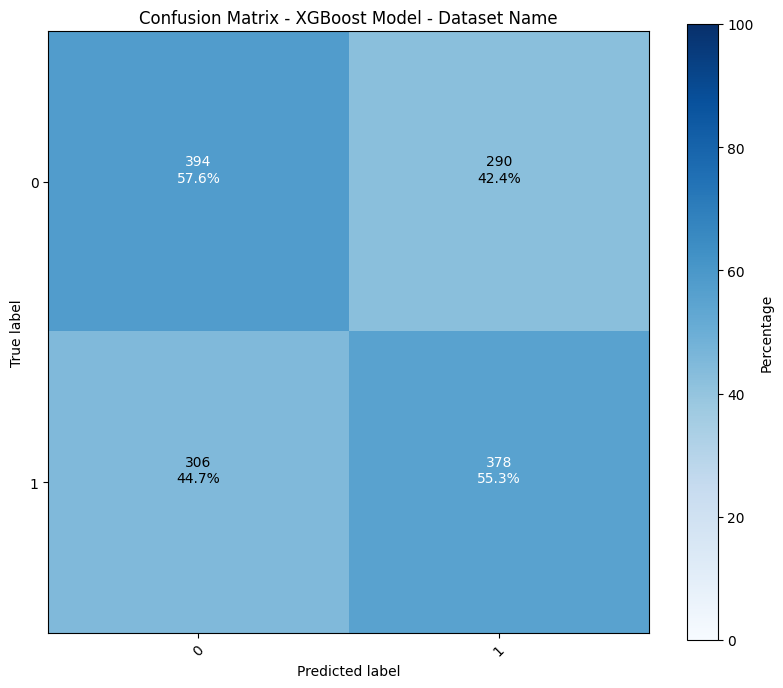


Precision, Recall, F1 Score per kelas:
Class 0:
  Precision : 0.56
  Recall    : 0.58
  F1 Score  : 0.57
Class 1:
  Precision : 0.57
  Recall    : 0.55
  F1 Score  : 0.56


In [123]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Data
X = undersampled_data.loc[:, 'F1':'F2']
y = undersampled_data['is_puso'].astype(int)

# Label Encoding for target variable y
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Encodes the labels to start from 0

# Model XGBoost
xgb_model = xgb.XGBClassifier(random_state=1234, eval_metric="mlogloss", n_jobs=16)

# Cross-validation (3-Fold)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)

# Scoring Metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform Cross-Validation
cv_results = cross_validate(xgb_model, X, y_encoded, cv=cv, scoring=scoring, return_train_score=True)

# Rata-rata skor untuk Training dan Testing
train_accuracy_mean = np.mean(cv_results['train_accuracy'])
test_accuracy_mean = np.mean(cv_results['test_accuracy'])

train_precision_mean = np.mean(cv_results['train_precision'])
test_precision_mean = np.mean(cv_results['test_precision'])

train_recall_mean = np.mean(cv_results['train_recall'])
test_recall_mean = np.mean(cv_results['test_recall'])

train_f1_mean = np.mean(cv_results['train_f1'])
test_f1_mean = np.mean(cv_results['test_f1'])

# Training dan Testing Summary
print("Rata-rata hasil training (3-Fold):")
print(f"  Akurasi   : {train_accuracy_mean:.2f}")
print(f"  Presisi   : {train_precision_mean:.2f}")
print(f"  Recall    : {train_recall_mean:.2f}")
print(f"  F1 Score  : {train_f1_mean:.2f}")

print("\nRata-rata hasil testing (3-Fold):")
print(f"  Akurasi   : {test_accuracy_mean:.2f}")
print(f"  Presisi   : {test_precision_mean:.2f}")
print(f"  Recall    : {test_recall_mean:.2f}")
print(f"  F1 Score  : {test_f1_mean:.2f}")

# Confusion Matrix for Final Evaluation
y_pred = cross_val_predict(xgb_model, X, y_encoded, cv=cv)

cm = confusion_matrix(y_encoded, y_pred)  # Frequency (count)
cm_percentages = (cm.T / cm.sum(axis=1) * 100).T  # Percentages
classes = encoder.classes_  # Get the original class labels after encoding

def plot_confusion_matrix(cm, classes, title, dataset_name):
    plt.figure(figsize=(8, 8))
    
    percentages = (cm.T / cm.sum(axis=1) * 100).T  # Normalize to get percentages
    
    plt.imshow(percentages, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=100)
    plt.title(f'Confusion Matrix - {title} - {dataset_name}')
    
    # Add colorbar with shrink parameter to reduce size
    cbar = plt.colorbar(label='Percentage', shrink=0.8)  # Shrinks the colorbar by 50%
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add frequency and percentage labels
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, f"{cm[i, j]}\n{percentages[i, j]:.1f}%", 
                     horizontalalignment='center', 
                     color='white' if percentages[i, j] > 50 else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plt.close()

# Call the function to plot the confusion matrix
plot_confusion_matrix(cm, classes, "XGBoost Model", "Dataset Name")

# Precision, Recall, F1 per class
precision_per_class = precision_score(y_encoded, y_pred, average=None)
recall_per_class = recall_score(y_encoded, y_pred, average=None)
f1_per_class = f1_score(y_encoded, y_pred, average=None)

print("\nPrecision, Recall, F1 Score per kelas:")
for i, cls in enumerate(classes):
    print(f"Class {cls}:")
    print(f"  Precision : {precision_per_class[i]:.2f}")
    print(f"  Recall    : {recall_per_class[i]:.2f}")
    print(f"  F1 Score  : {f1_per_class[i]:.2f}")

Rata-rata hasil training (3-Fold):
  Akurasi   : 0.88
  Presisi   : 0.88
  Recall    : 0.88
  F1 Score  : 0.84

Rata-rata hasil testing (3-Fold):
  Akurasi   : 0.86
  Presisi   : 0.79
  Recall    : 0.86
  F1 Score  : 0.82


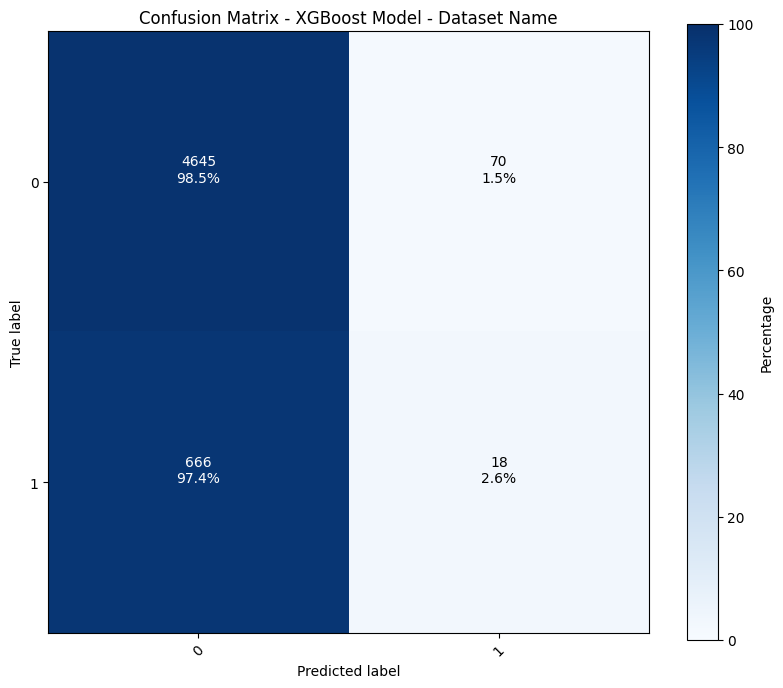


Precision, Recall, F1 Score per kelas:
Class 0:
  Precision : 0.87
  Recall    : 0.99
  F1 Score  : 0.93
Class 1:
  Precision : 0.20
  Recall    : 0.03
  F1 Score  : 0.05


In [125]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Data
X = data.loc[:, 'F1':'F2']
y = data['is_puso'].astype(int)

# Label Encoding for target variable y
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Encodes the labels to start from 0

# Model XGBoost
xgb_model = xgb.XGBClassifier(random_state=1234, eval_metric="mlogloss", n_jobs=16)

# Cross-validation (3-Fold)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)

# Scoring Metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform Cross-Validation
cv_results = cross_validate(xgb_model, X, y_encoded, cv=cv, scoring=scoring, return_train_score=True)

# Rata-rata skor untuk Training dan Testing
train_accuracy_mean = np.mean(cv_results['train_accuracy'])
test_accuracy_mean = np.mean(cv_results['test_accuracy'])

train_precision_mean = np.mean(cv_results['train_precision'])
test_precision_mean = np.mean(cv_results['test_precision'])

train_recall_mean = np.mean(cv_results['train_recall'])
test_recall_mean = np.mean(cv_results['test_recall'])

train_f1_mean = np.mean(cv_results['train_f1'])
test_f1_mean = np.mean(cv_results['test_f1'])

# Training dan Testing Summary
print("Rata-rata hasil training (3-Fold):")
print(f"  Akurasi   : {train_accuracy_mean:.2f}")
print(f"  Presisi   : {train_precision_mean:.2f}")
print(f"  Recall    : {train_recall_mean:.2f}")
print(f"  F1 Score  : {train_f1_mean:.2f}")

print("\nRata-rata hasil testing (3-Fold):")
print(f"  Akurasi   : {test_accuracy_mean:.2f}")
print(f"  Presisi   : {test_precision_mean:.2f}")
print(f"  Recall    : {test_recall_mean:.2f}")
print(f"  F1 Score  : {test_f1_mean:.2f}")

# Confusion Matrix for Final Evaluation
y_pred = cross_val_predict(xgb_model, X, y_encoded, cv=cv)

cm = confusion_matrix(y_encoded, y_pred)  # Frequency (count)
cm_percentages = (cm.T / cm.sum(axis=1) * 100).T  # Percentages
classes = encoder.classes_  # Get the original class labels after encoding

def plot_confusion_matrix(cm, classes, title, dataset_name):
    plt.figure(figsize=(8, 8))
    
    percentages = (cm.T / cm.sum(axis=1) * 100).T  # Normalize to get percentages
    
    plt.imshow(percentages, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=100)
    plt.title(f'Confusion Matrix - {title} - {dataset_name}')
    
    # Add colorbar with shrink parameter to reduce size
    cbar = plt.colorbar(label='Percentage', shrink=0.8)  # Shrinks the colorbar by 50%
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add frequency and percentage labels
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, f"{cm[i, j]}\n{percentages[i, j]:.1f}%", 
                     horizontalalignment='center', 
                     color='white' if percentages[i, j] > 50 else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plt.close()

# Call the function to plot the confusion matrix
plot_confusion_matrix(cm, classes, "XGBoost Model", "Dataset Name")

# Precision, Recall, F1 per class
precision_per_class = precision_score(y_encoded, y_pred, average=None)
recall_per_class = recall_score(y_encoded, y_pred, average=None)
f1_per_class = f1_score(y_encoded, y_pred, average=None)

print("\nPrecision, Recall, F1 Score per kelas:")
for i, cls in enumerate(classes):
    print(f"Class {cls}:")
    print(f"  Precision : {precision_per_class[i]:.2f}")
    print(f"  Recall    : {recall_per_class[i]:.2f}")
    print(f"  F1 Score  : {f1_per_class[i]:.2f}")

Rata-rata hasil training (3-Fold):
  Akurasi   : 0.85
  Presisi   : 0.86
  Recall    : 0.85
  F1 Score  : 0.81

Rata-rata hasil testing (3-Fold):
  Akurasi   : 0.82
  Presisi   : 0.73
  Recall    : 0.82
  F1 Score  : 0.76


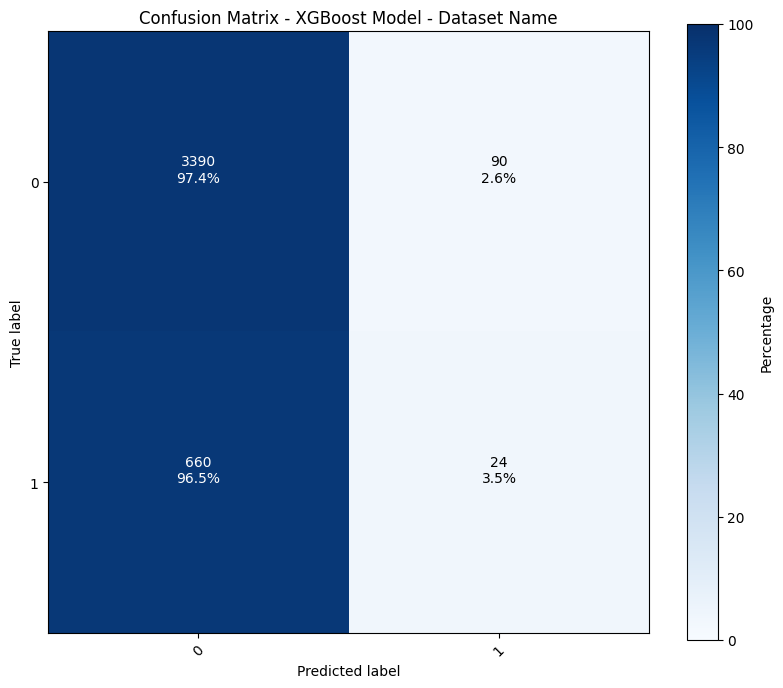


Precision, Recall, F1 Score per kelas:
Class 0:
  Precision : 0.84
  Recall    : 0.97
  F1 Score  : 0.90
Class 1:
  Precision : 0.21
  Recall    : 0.04
  F1 Score  : 0.06


In [127]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Data
X = data_drop_np.loc[:, 'F1':'F2']
y = data_drop_np['is_puso'].astype(int)

# Label Encoding for target variable y
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Encodes the labels to start from 0

# Model XGBoost
xgb_model = xgb.XGBClassifier(random_state=1234, eval_metric="mlogloss", n_jobs=16)

# Cross-validation (3-Fold)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)

# Scoring Metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform Cross-Validation
cv_results = cross_validate(xgb_model, X, y_encoded, cv=cv, scoring=scoring, return_train_score=True)

# Rata-rata skor untuk Training dan Testing
train_accuracy_mean = np.mean(cv_results['train_accuracy'])
test_accuracy_mean = np.mean(cv_results['test_accuracy'])

train_precision_mean = np.mean(cv_results['train_precision'])
test_precision_mean = np.mean(cv_results['test_precision'])

train_recall_mean = np.mean(cv_results['train_recall'])
test_recall_mean = np.mean(cv_results['test_recall'])

train_f1_mean = np.mean(cv_results['train_f1'])
test_f1_mean = np.mean(cv_results['test_f1'])

# Training dan Testing Summary
print("Rata-rata hasil training (3-Fold):")
print(f"  Akurasi   : {train_accuracy_mean:.2f}")
print(f"  Presisi   : {train_precision_mean:.2f}")
print(f"  Recall    : {train_recall_mean:.2f}")
print(f"  F1 Score  : {train_f1_mean:.2f}")

print("\nRata-rata hasil testing (3-Fold):")
print(f"  Akurasi   : {test_accuracy_mean:.2f}")
print(f"  Presisi   : {test_precision_mean:.2f}")
print(f"  Recall    : {test_recall_mean:.2f}")
print(f"  F1 Score  : {test_f1_mean:.2f}")

# Confusion Matrix for Final Evaluation
y_pred = cross_val_predict(xgb_model, X, y_encoded, cv=cv)

cm = confusion_matrix(y_encoded, y_pred)  # Frequency (count)
cm_percentages = (cm.T / cm.sum(axis=1) * 100).T  # Percentages
classes = encoder.classes_  # Get the original class labels after encoding

def plot_confusion_matrix(cm, classes, title, dataset_name):
    plt.figure(figsize=(8, 8))
    
    percentages = (cm.T / cm.sum(axis=1) * 100).T  # Normalize to get percentages
    
    plt.imshow(percentages, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=100)
    plt.title(f'Confusion Matrix - {title} - {dataset_name}')
    
    # Add colorbar with shrink parameter to reduce size
    cbar = plt.colorbar(label='Percentage', shrink=0.8)  # Shrinks the colorbar by 50%
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add frequency and percentage labels
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, f"{cm[i, j]}\n{percentages[i, j]:.1f}%", 
                     horizontalalignment='center', 
                     color='white' if percentages[i, j] > 50 else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plt.close()

# Call the function to plot the confusion matrix
plot_confusion_matrix(cm, classes, "XGBoost Model", "Dataset Name")

# Precision, Recall, F1 per class
precision_per_class = precision_score(y_encoded, y_pred, average=None)
recall_per_class = recall_score(y_encoded, y_pred, average=None)
f1_per_class = f1_score(y_encoded, y_pred, average=None)

print("\nPrecision, Recall, F1 Score per kelas:")
for i, cls in enumerate(classes):
    print(f"Class {cls}:")
    print(f"  Precision : {precision_per_class[i]:.2f}")
    print(f"  Recall    : {recall_per_class[i]:.2f}")
    print(f"  F1 Score  : {f1_per_class[i]:.2f}")

In [154]:
# Assuming that 'X' contains the features from 'undersampled_data_drop_np'
X_full = undersampled_data_drop_np.loc[:, 'F1':'F10']

# Predict the target variable for all observations
predictions = best_model.predict(X_full)

# Add the predictions as a new column in the DataFrame
undersampled_data_drop_np['predictions'] = predictions

In [155]:
undersampled_data_drop_np

,Unnamed: 0,idsubsegmen_repair,obs,tahun,bulan,kdprov,idsubfinal,idkab,idkec,idsegmen,...,F2,F3,F4,F5,F6,F7,F8,F9,F10,predictions
0,3915,320104008A2,4.0,22,7,32,320104008A2227,3201,3201040,320104008,...,149,155,9,0,140,161,21,151.53125,24.128024,0
1,1837,321705005A2,5.0,23,11,32,321705005A22311,3217,3217050,321705005,...,114,148,5,0,114,152,38,136.96875,112.031250,0
2,2223,320212115C3,1.0,23,5,32,320212115C3235,3202,3202121,320212115,...,127,162,1,6,114,162,48,145.15625,143.619960,0
3,2409,320130006C3,4.0,23,2,32,320130006C3232,3201,3201300,320130006,...,139,153,5,9,139,161,22,150.75000,48.516129,1
4,2723,321014001B3,5.0,23,12,32,321014001B32312,3210,3210140,321014001,...,76,109,4,9,76,157,81,113.78125,373.079637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,71,321612002C2,6.0,23,9,32,321612002C2239,3216,3216120,321612002,...,114,147,0,6,81,158,77,134.84375,391.232863,1
1364,302,321203003B1,6.0,23,8,32,321203003B1238,3212,3212030,321203003,...,91,129,7,1,91,161,70,121.25000,296.387097,1
1365,1635,320521014B2,6.0,23,11,32,320521014B22311,3205,3205210,320521014,...,102,111,8,0,67,128,61,108.59375,248.184476,1
1366,2390,320508039C1,6.0,23,2,32,320508039C1232,3205,3205080,320508039,...,150,160,4,9,150,171,21,156.62500,34.241935,1


In [149]:
# Combine observed and predicted into a DataFrame for easier plotting
undersampled_data_drop_np['predictions'] = undersampled_data_drop_np['predictions'].astype(str)
undersampled_data_drop_np['observ'] = undersampled_data_drop_np['observ'].astype(str)

pivot_data = undersampled_data_drop_np[['observ', 'predictions']]

In [156]:
import pandas as pd

# Ensure 'observ' and 'predictions' are categorical for grouping
undersampled_data_drop_np['predictions'] = undersampled_data_drop_np['predictions'].astype(str)
undersampled_data_drop_np['observ'] = undersampled_data_drop_np['observ'].astype(str)

# Create a DataFrame for the 'observ' and 'predictions' columns
pivot_data = undersampled_data_drop_np[['observ', 'predictions']]

# Get frequency counts of each combination
pivot_data_frequency = pivot_data.groupby(['observ', 'predictions']).size().reset_index(name='frequency')

# Display the resulting DataFrame
print(pivot_data_frequency)

# If you want to plot this data (e.g., as a heatmap or bar plot), you can use seaborn or matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for easier plotting (this will create a matrix with frequency counts)
pivot_table = pivot_data_frequency.pivot('observ', 'predictions', 'frequency')

# Plot the data as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='g')
plt.title('Frequency of Observed vs Predicted Values')
plt.show()

   observ predictions  frequency
0     1.0           0        119
1     1.0           1         13
2     2.0           0         83
3     2.0           1         13
4     3.0           0        107
5     3.0           1         17
6     4.0           0        232
7     4.0           1         26
8     5.0           0         66
9     5.0           1          8
10    6.0           0         73
11    6.0           1        611


TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [158]:
pivot_data_frequency.to_csv('pivot.csv')